# How To Use This Tool
(For those new to Google Colab Notebooks)

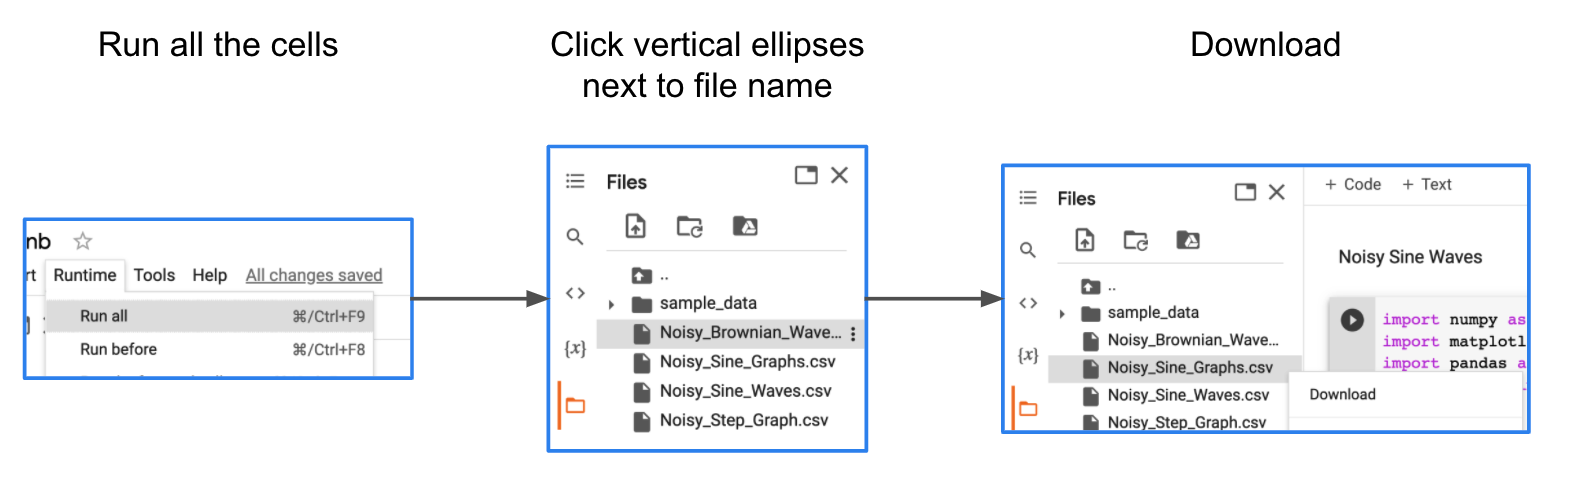

# Overview

This tool generates some noisy graphs and saves them as CSV's. There are definitely some ways to improve this tool (i.e. comments, throwing this into github), but I was assuming that was out of the scope of this task.

Noisy Sine Waves

,ACS_POS_X,ACS_POS_Y,ACS_POS_Z,PIE_VAL_X,PIE_VAL_Y,PIE_VAL_Z
2022-03-01 00:00:00,0.764052,20.078282,30.581045,70.743899,86.053605,89.443575
2022-03-01 00:15:00,-0.599843,17.600113,31.284627,69.285013,87.214517,88.776624
2022-03-01 00:30:00,-0.021262,17.442093,29.571125,68.775756,86.344714,91.797994


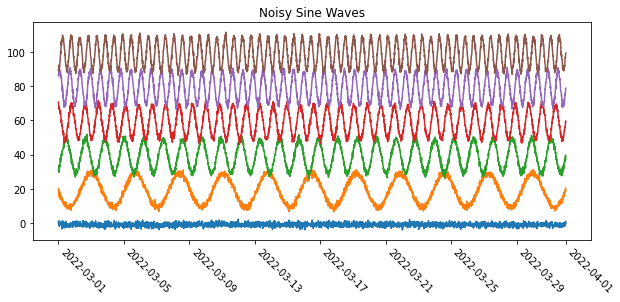

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

fake_mneumonics = ["ACS_POS_X", "ACS_POS_Y", "ACS_POS_Z",
                   "PIE_VAL_X", "PIE_VAL_Y", "PIE_VAL_Z",
                   "SSR_VAL_X", "SSR_VAL_Y", "SSR_VAL_Z"]

timestamps = pd.date_range("1-MAR-2022 00:00:00", 
                            "1-APR-2022 00:00:00", 
                            freq="15T")
amplitude = 10
number_of_waves = len(timestamps) // 4 // 30
num_points = len(timestamps)
df = None

for i in range(6):
    np.random.seed(i)
    noise = np.random.normal(-1, 1, num_points)

    start = np.random.normal(-1, 1, 1)[0]
    x = np.linspace(start, number_of_waves, num_points)
    y = amplitude*np.sin(x*np.pi*i) 
    y += noise    # Noise
    y += 2*i*amplitude # Vertial Shift

    temp = pd.DataFrame({fake_mneumonics[i]:y}, index=timestamps)

    if df is None:
        df = temp
    else:
        df = pd.merge(df, temp, left_index=True, right_index=True)
display(df.head(3))

plt.figure(figsize=(10,4))
plt.plot(df)
plt.xticks(rotation=-45,  ha="left")
plt.title("Noisy Sine Waves")
plt.show()

df.to_csv("Noisy_Sine_Graphs.csv")

Brownian Motion

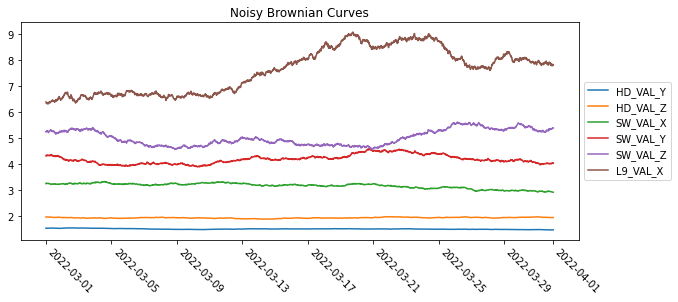

,HD_VAL_Y,HD_VAL_Z,SW_VAL_X,SW_VAL_Y,SW_VAL_Z,L9_VAL_X
2022-03-01 00:00:00,1.537505,1.973236,3.247864,4.315512,5.238148,6.383750
2022-03-01 00:15:00,1.537813,1.972078,3.244812,4.323501,5.229755,6.362851
2022-03-01 00:30:00,1.538565,1.971332,3.251588,4.333729,5.248343,6.341731


In [36]:
fake_mneumonics = ["HD_VAL_X", "HD_VAL_Y", "HD_VAL_Z",
                   "SW_VAL_X", "SW_VAL_Y", "SW_VAL_Z",
                   "L9_VAL_X", "L9_VAL_Y", "L9_VAL_Z"]

np.random.seed(0)
df_2 = pd.DataFrame(index=timestamps)

plt.figure(figsize=(10,4))
for i in range(1,7):
    pct_changes = np.random.normal(1, .0005*i, len(timestamps))

    df_2[fake_mneumonics[i]] = np.cumprod(pct_changes) * np.random.normal(i,.5, 1)[0] # Random Vertical Shift
    plt.plot(df_2[fake_mneumonics[i]], label=fake_mneumonics[i])

plt.xticks(rotation=-45,  ha="left")
plt.title("Noisy Brownian Curves")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

df_2.to_csv("Noisy_Brownian_Graphs.csv")
display(df_2.head(3))

Noisy Step Functions

No handles with labels found to put in legend.


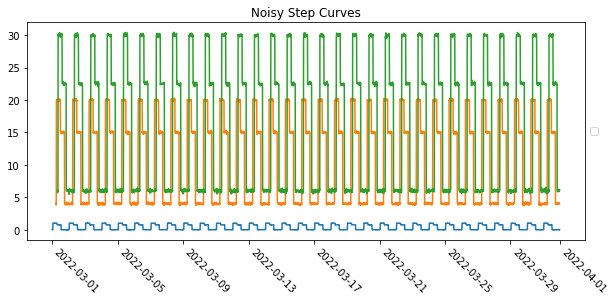

,TLM_VAL_X,TLM_VAL_Z,MDM_VAL_X
2022-03-31 23:30:00,0.006336,4.117891,6.239122
2022-03-31 23:45:00,0.021317,4.050915,6.004582
2022-04-01 00:00:00,0.000333,4.029729,6.069619


In [38]:
fake_mneumonics = ["TLM_VAL_X", "TLM_VAL_Y", "TLM_VAL_Z",
                   "MDM_VAL_X", "MDM_VAL_Y", "MDM_VAL_Z",
                   "CRC_VAL_X", "CRC_VAL_Y", "CRC_VAL_Z"]
                   
df_3 = pd.DataFrame(index=timestamps)

def noisy_step_func(index, min=0, max=1, std=.01):
    if index.hour == 0:
        return np.random.normal(min, std, 1)[0]
    elif index.hour <= 6:
        return np.random.normal(max, std, 1)[0]
    elif index.hour <= 12:
        return np.random.normal(.75*max, std, 1)[0]
    elif index.hour <= 18:
        return np.random.normal(min, std, 1)[0]
    else:
        return np.random.normal(min, std, 1)[0]

df_3[fake_mneumonics[0]] = [noisy_step_func(x) for x in df_3.index]
for i in range(2, 4):
    df_3[fake_mneumonics[i]] = [noisy_step_func(x, min=i*2, max=i*10, std=i*5*.01) 
                          for x in df_3.index]
    df_3[fake_mneumonics[i]] = df_3[fake_mneumonics[i]].shift(i*10)

plt.figure(figsize=(10,4))
plt.plot(df_3)

plt.xticks(rotation=-45,  ha="left")
plt.title("Noisy Step Curves")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

df_3.to_csv("Noisy_Step_Graph.csv")
display(df_3.tail(3))

In [22]:
df.index[4*20]

Timestamp('2022-03-01 20:00:00', freq='15T')